In [79]:
import cobra
import pandas as pd
import re
import numpy as np
import scipy.stats as st
import re

In [80]:
import pubchempy as pcp

In [81]:
model = cobra.io.read_sbml_model('../models/e_coli/momentiJO1366.xml')


In [82]:
# Read measurements
measurements = pd.read_csv('../data/e_coli/e_coli_measurements.csv')
#measurements.drop(columns = ["Note"], inplace = True)

In [5]:
# Read metabolite mapping
mapping_df = pd.read_csv('../data/id_mapping.csv')

In [6]:
mapping_df

,Abbreviation,Metabolite name,Ecoli metabolite,Yeast metabolite,Bacillus metabolite,Cglutamicum metabolite
0,G6P,Glucose-6-phosphate,g6p,s_0568,g6p_A,g6p
1,F6P,Fructose-6-phosphate,f6p,s_0557,f6p_B,f6p
2,FBP,"Fructose-1,6-bisphosphate",fdp,s_0555,fdp_B,fdp
3,DHAP,Dihydroxyacetonephosphate,dhap,s_0629,dhap,dhap
4,GA3P,Glyceraldehyde-3-phosphate,g3p,s_0764,g3p,g3p
5,23PG,2/3-phosphoglycerate,"2pg, 3pg","s_0188, s_0260","2pg, 3pg","2pg, 3pg"
6,PEP,Phosphoenolpyruvate,pep,s_1360,pep,pep
7,R5P,Ribose-5-phosphate,r5p,s_1408,r5p,r5p
8,RU5P+X5P,Ribu-/Xylulose-5-phosphate,"ru5p__D, ru5p__L, xu5p__D, xu5p__L","s_0577, s_0581","ru5p__D, ru5p__L, xu5p__D","ru5p__D, xu5p__D"
9,E4P,Erythrose-4-phosphate,e4p,s_0551,e4p,e4p


In [10]:
met_info_df = mapping_df[["Metabolite name", "Ecoli metabolite"]]


In [11]:
met_info_df = pd.merge(met_info_df, measurements, on = "Metabolite name")

In [68]:
def get_polarity_from_pubchem(m):
    print(m.name)
    compounds = pcp.get_compounds(m.name, "name")
    if len(compounds) > 1:
        print([c.tpsa for c in compounds])
    elif not len(compounds): 
        print("No tpsa found for {0}".format(m.name))
        return np.nan
    c = compounds[0]
    print(c.synonyms[:2], c.tpsa)
    return c.tpsa

def get_pubchem_data(name):
    compounds = pcp.get_compounds(name, "name")
    if len(compounds) > 1:
        print([(c.synonyms[0], c.tpsa) for c in compounds])
    elif not len(compounds): 
        print("No tpsa found for {0}".format(name))
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    c = compounds[0]
    print(name, c.synonyms[:2], len(compounds))
    return c.h_bond_donor_count, c.h_bond_acceptor_count, c.rotatable_bond_count, c.cid, c.tpsa, c.charge, c.xlogp
    

In [48]:
c.charge


0

# Update on August 2024

In [93]:
met_info_3 = pd.read_csv('../data/met_info_3.csv')


In [94]:
row

Mass                               180.15588
Metabolite id                            NaN
Charge                                   NaN
Phosphate                                NaN
Intracellular concentration [M]          NaN
Compound class                         Other
Ref                                      NaN
Comment                                  NaN
Hydrogen Bond Donor Count                NaN
Hydrogen Bond Acceptor Count             NaN
Rotatable Bond Count                     NaN
Topological Polar Surface Area           NaN
Charge (pubchem)                         NaN
xlogP                                    NaN
pubchem id                               NaN
Name: Hexoses, dtype: object

In [95]:
data = []
for i, row in met_info_3.iterrows():
    name = row['Metabolite']
    donor, acceptor, rotatable, cid, tpsa, charge, xlogp = get_pubchem_data(name)
    if tpsa != row['Topological Polar Surface Area []']:
        print(name, "!!", tpsa, row['Topological Polar Surface Area []'])
    data.append([name, donor, acceptor, rotatable, tpsa, charge, xlogp, cid])

2-phosphoglycerate ['2-phosphoglyceric acid', '2-phosphoglycerate'] 1
3-phosphoglycerate ['3-phosphoglycerate', 'glycerate 3-phosphate'] 1
Acetate ['acetate', 'Acetate Ion'] 1
[('L-alanine', 63.3), ('DL-ALANINE', 63.3), ('D-alanine', 63.3)]
Alanine ['L-alanine', '56-41-7'] 3
[('2-Aminohexanedioic acid', 101), ('2-aminoadipate(2-)', 106)]
Alpha-aminoadipate ['2-Aminohexanedioic acid', '542-32-5'] 2
Alpha-aminobutyrate ['alpha-aminobutyrate', '2-aminobutyrate'] 1
[('2-ketoglutaric acid', 91.7), ('alpha-ketoglutarate', 97.3)]
Alpha-ketoglutarate ['2-ketoglutaric acid', '2-Oxopentanedioic acid'] 2
Arginine ['L-arginine', 'arginine'] 1
Asparagine ['L-asparagine', 'asparagine'] 1
[('L-aspartic acid', 101), ('(2S)-2-aminobutanedioate', 106), ('(2S)-2-ammoniobutanedioate', 108)]
Aspartate ['L-aspartic acid', 'aspartic acid'] 3
Beta-alanine ['beta-alanine', '3-Aminopropanoic acid'] 1
Cis-aconitate ['cis-Aconitic acid', '585-84-2'] 1
Citrate ['126-44-3', 'Citrate'] 1
Creatine ['creatine', '57-00

KeyboardInterrupt: 

In [76]:
pubchem_data = pd.DataFrame(data, columns = ['Metabolite', 'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count', 'Rotatable Bond Count', 'Topological Polar Surface Area', 'Charge (pubchem)', 'xlogP', 'pubchem id'])

In [77]:
met_info_4 = met_info_3.merge(pubchem_data, left_on='Metabolite', right_on='Metabolite')

In [ ]:
met_info_4.to_csv('../data/met_info_4.csv')


# Update september 2024


In [118]:
met_info_4 = pd.read_csv('../data/met_info_4.csv')

In [119]:
for i, row in met_info_4.iterrows():
    if np.isnan(row['Hydrogen Bond Donor Count']):
        name = row['Metabolite']
        print(name)
        donor, acceptor, rotatable, cid, tpsa, charge, xlogp = get_pubchem_data(name)
        met_info_4.at[i, 'Hydrogen Bond Donor Count'] = donor
        met_info_4.at[i, 'Hydrogen Bond Acceptor Count'] = acceptor
        met_info_4.at[i, 'Rotatable Bond Count'] = rotatable
        met_info_4.at[i, 'Topological Polar Surface Area'] = tpsa
        met_info_4.at[i, 'Charge (pubchem)'] = charge
        met_info_4.at[i, 'xlogP'] = xlogp
        met_info_4.at[i, 'pubchem id'] = cid
        
        # , , 'Topological Polar Surface Area', 'Charge (pubchem)', 'xlogP', 'pubchem id'

Formate
Formate ['formate', 'Formic acid, ion(1-)'] 1
Hexoses
Hexoses ['2,3,4,5,6-pentahydroxyhexanal', 'Mannose, D-'] 1
Propionate
Propionate ['propionate', 'propanoate'] 1


In [121]:
met_info_4.to_csv('../data/met_info_5.csv')


In [37]:
def calculate_oxidation_state_of_carbon(formula, charge = 0):
    """
    https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0022782
    See equation 2
    And then 5 for P
    """
    e = {key.upper():value for key, value in re.findall(r'([A-Z][a-z]*)(\d*)', formula)}
    for key, value in e.items():
        if len(value):
            e[key]=int(value)
        else:
            e[key]=0
    for k in ['O', 'S', 'N', 'P']:
        try:
            e[k]
        except KeyError:
            e[k]=0
    print(e, charge)
    return (charge-e['H']+2*(e['O']+e['S'])+3*e['N']+5*e['P'])/e['C']
        
    
    
#     The oxidation number of a free element is always 0.
# The oxidation number of a monatomic ion equals the charge of the ion.
# Fluorine in compounds is always assigned an oxidation number of -1.
# The alkali metals (group I) always have an oxidation number of +1.
# The alkaline earth metals (group II) are always assigned an oxidation number of +2.
# Oxygen almost always has an oxidation number of -2, except in peroxides (H2O2) where it is -1 and in compounds with fluorine (OF2) where it is +2.
# Hydrogen has an oxidation number of +1 when combined with non-metals, but it has an oxidation number of -1 when combined with metals.
# The algebraic sum of the oxidation numbers of elements in a compound is zero.
# The algebraic sum of the oxidation states in an ion is equal to the charge on the ion

In [30]:
formula = 'C6H12O6'
elements = {key:int(value) for key, value in re.findall(r'([A-Z][a-z]*)(\d*)', formula)}


In [23]:
elements

{'C': '6', 'H': '12', 'O': '6'}

In [38]:
mass = {}
charge = {}
n_phosphate = {}
polarity = {}
average_oxidation_state = {}
for i, row in met_info_df.iterrows():
    m_text = row["Ecoli metabolite"]
    try:
        keys = m_text.split(",")
    except:
        print(m_text)
        continue
    formula_list = []
    mass_list = []
    charge_list = []
    np_list = []
    polar_list = []
    ox_list = []
    for key in keys:
        m_id = "{0}_c".format(key.strip())
        m = model.metabolites.get_by_id(m_id)
        mass_list.append(m.formula_weight)
        charge_list.append(m.charge)
        try:
            np_list.append(m.elements['P'])
        except KeyError:
            np_list.append(0)
        polar_list.append(get_polarity_from_pubchem(m))
        ox_list.append(calculate_oxidation_state_of_carbon(m.formula, m.charge))
        
    mass[i] = np.mean(mass_list)
    charge[i] = np.mean(charge_list)
    n_phosphate[i] = np.mean(np_list)
    polarity[i] = np.mean(polar_list)
    average_oxidation_state[i] = np.mean(ox_list)

D-Glucose 6-phosphate
[165, 165]
['56-73-5', 'D-Glucose 6-phosphate'] 165
{'C': 6, 'H': 11, 'O': 9, 'P': 0, 'S': 0, 'N': 0} -2
D-Fructose 6-phosphate
['fructose-6-phosphate', 'Fructose 6-Phosphate'] 165
{'C': 6, 'H': 11, 'O': 9, 'P': 0, 'S': 0, 'N': 0} -2
D-Fructose 1,6-bisphosphate
No tpsa found for D-Fructose 1,6-bisphosphate
{'C': 6, 'H': 10, 'O': 12, 'P': 2, 'S': 0, 'N': 0} -4
Dihydroxyacetone phosphate
['DIHYDROXYACETONE PHOSPHATE', 'Glycerone phosphate'] 104
{'C': 3, 'H': 5, 'O': 6, 'P': 0, 'S': 0, 'N': 0} -2
Glyceraldehyde 3-phosphate
[104, 110]
['DL-Glyceraldehyde 3-phosphate', '3-phosphoglyceraldehyde'] 104
{'C': 3, 'H': 5, 'O': 6, 'P': 0, 'S': 0, 'N': 0} -2
D-Glycerate 2-phosphate
['2-Phospho-D-Glyceric Acid', '2-phospho-D-glycerate'] 124
{'C': 3, 'H': 4, 'O': 7, 'P': 0, 'S': 0, 'N': 0} -3
3-Phospho-D-glycerate
['3-phospho-D-glycerate', '3-phosphoglyceric acid'] 124
{'C': 3, 'H': 4, 'O': 7, 'P': 0, 'S': 0, 'N': 0} -3
Phosphoenolpyruvate
['phosphoenolpyruvate', 'Phosphoenolpyr

In [39]:
met_info_df["Mass"] = pd.Series(mass)
met_info_df["Charge"] = pd.Series(charge)
met_info_df["Phosphate"] = pd.Series(n_phosphate)
met_info_df["Topological Polar Surface Area [Å]"] = pd.Series(polarity)
met_info_df["Average carbon oxidation"]= pd.Series(average_oxidation_state)

In [40]:
met_info_df.to_csv("met_info.csv")

# Additional data

In [42]:
df = pd.read_csv('../data/met_info_curated.csv', index_col = 0)

In [44]:
average_oxidation_state = {}
for i, row in df.iterrows():
    m_text = row["Metabolite id"]
    try:
        keys = m_text.split(",")
    except:
        print(m_text)
        continue
    ox_list = []
    for key in keys:
        m_id = "{0}_c".format(key.strip())
        m = model.metabolites.get_by_id(m_id)
        ox_list.append(calculate_oxidation_state_of_carbon(m.formula, m.charge))
    average_oxidation_state[i] = np.mean(ox_list)

{'C': 6, 'H': 11, 'O': 9, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 6, 'H': 11, 'O': 9, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 6, 'H': 10, 'O': 12, 'P': 2, 'S': 0, 'N': 0} -4
{'C': 3, 'H': 5, 'O': 6, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 3, 'H': 5, 'O': 6, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 3, 'H': 4, 'O': 7, 'P': 0, 'S': 0, 'N': 0} -3
{'C': 3, 'H': 4, 'O': 7, 'P': 0, 'S': 0, 'N': 0} -3
{'C': 3, 'H': 2, 'O': 6, 'P': 0, 'S': 0, 'N': 0} -3
{'C': 3, 'H': 3, 'O': 3, 'S': 0, 'N': 0, 'P': 0} -1
{'C': 6, 'H': 10, 'O': 10, 'P': 0, 'S': 0, 'N': 0} -3
{'C': 5, 'H': 9, 'O': 8, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 5, 'H': 9, 'O': 8, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 5, 'H': 9, 'O': 8, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 5, 'H': 9, 'O': 8, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 5, 'H': 9, 'O': 8, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 4, 'H': 7, 'O': 7, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 7, 'H': 13, 'O': 10, 'P': 0, 'S': 0, 'N': 0} -2
{'C': 23, 'H': 34, 'N': 7, 'O': 17, 'P': 3, 'S': 0} -4
{'C': 6, 'H': 5, 'O': 7, 'S': 0, 'N': 0, 'P': 0} -3
{

In [45]:
df["Average carbon oxidation"]= pd.Series(average_oxidation_state)

In [46]:
df.to_csv('../data/met_info_curated2.csv')

In [47]:
met_info_df = met_info_df.loc[~met_info_df.isna().any(axis = 1), :]
met_info_df = met_info_df.loc[met_info_df.Value != 0, :]

In [48]:
met_info_df["log10(metabolite concentration)"] = np.log10(met_info_df.Value)

-0.2046507395799165 0.26119861655505655


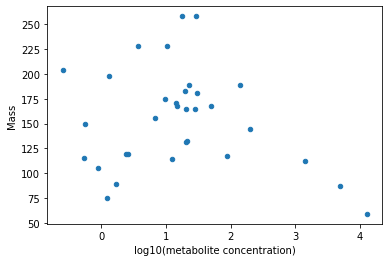

In [49]:
met_info_df.plot.scatter(x = "log10(metabolite concentration)", y = "Mass")
corrp = st.pearsonr(met_info_df["log10(metabolite concentration)"], met_info_df.Mass)
print(corrp[0], corrp[1])

-0.23295188568842964 0.1994625802825393


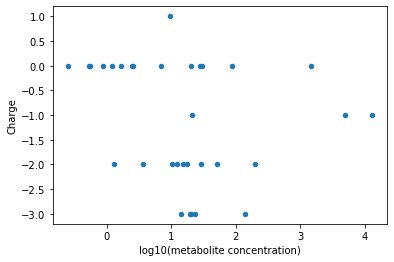

In [50]:
met_info_df.plot.scatter(x = "log10(metabolite concentration)", y = "Charge")
corrp = st.pearsonr(met_info_df["log10(metabolite concentration)"], met_info_df.Charge)
print(corrp[0], corrp[1])

-0.054931520346511935 0.7652437184094022


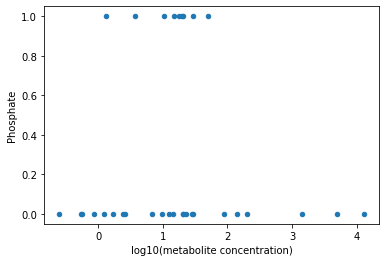

In [51]:
met_info_df.plot.scatter(x = "log10(metabolite concentration)", y = "Phosphate")
corrp = st.pearsonr(met_info_df["log10(metabolite concentration)"], met_info_df.Phosphate)
print(corrp[0], corrp[1])

-0.14272067538148706 0.4358439550028726


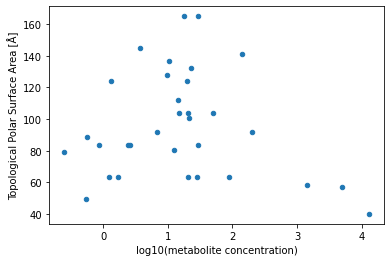

In [52]:
met_info_df.plot.scatter(x = "log10(metabolite concentration)", y = "Topological Polar Surface Area [Å]")
corrp = st.pearsonr(met_info_df["log10(metabolite concentration)"], met_info_df["Topological Polar Surface Area [Å]"])
print(corrp[0], corrp[1])